In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = pd.read_csv('/data/modeling_data_train.csv').set_index('id').drop(columns=['Unnamed: 0'])
X_test = pd.read_csv('/data/modeling_data_test.csv').set_index('id').drop(columns=['Unnamed: 0'])
y_train = pd.read_csv('/data/train_pred.csv').set_index('id').drop(columns=['Unnamed: 0'])


# Grid Search

In [ ]:
def grid_search(model, grid, X_train,y_train, cv=None):
    gs = GridSearchCV(estimator=model, param_grid=grid, cv=cv)
    gs.fit(X_train, y_train)
    return gs.best_params_


def randomized_search(model, params, X_train, Y_train):
    gs_rand = RandomizedSearchCV(model, params)
    gs_rand.fit(X_train, y_train)
    return gs.best_params_


# Decision Tree

### Classifier Evaluation

In [ ]:
def evaluate_classifier(model, X, y_actual):
    model.fit(X_train, y_actual)
    y_pred = model.predict(X)

    acc = accuracy_score(y_actual, y_pred)
    print("Accuracy: {0}".format(acc))
    plot_confusion_matrix(model,X,y_actual)

### baseline model Decision Tree

Our basline model has a high accuracy but it could be overfitting

Accuracy: 0.8764169172427333


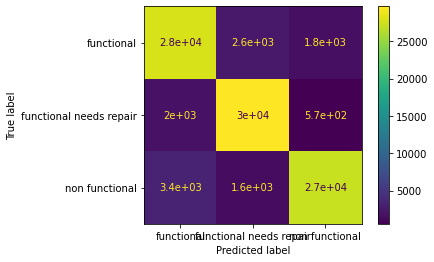

In [ ]:
tree_clf_baseline = DecisionTreeClassifier(random_state=666)
evaluate_classifier(tree_clf_baseline, X_train, y_train)


### Parameter Tuning

To handle overfitting we'll modify:


*   minimum samples per leaf node
*   Max number of leaf nodes
*   Minimum impurity decrease



In [ ]:
num_samples = len(X_train)

grid = {'min_samples_leaf' : [1,.15,.5,.03,.25]
      ,'max_leaf_nodes' : [4,5,40]
      ,'min_impurity_decrease' : [.15,.25,.5,.33]
      ,'criterion': ['gini', 'entropy']}


tuning_model = DecisionTreeClassifier(random_state=666)
best_params = grid_search(tuning_model, grid, X_train, y_train)
best_params

{'criterion': 'entropy',
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.15,
 'min_samples_leaf': 0.15,
 'splitter': 'best'}

## Gradient Boosting 

['non functional' 'functional' 'functional' ... 'non functional'
 'non functional' 'non functional']
Accuracy: 0.7641898384946837


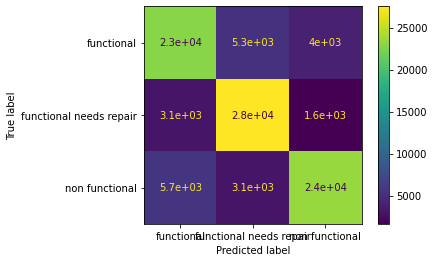

In [ ]:
gbc = GradientBoostingClassifier(random_state=666)
evaluate_classifier(gbc, X_train, y_train.values.ravel())

## AdaBoost Classifier

Accuracy: 0.7641898384946837


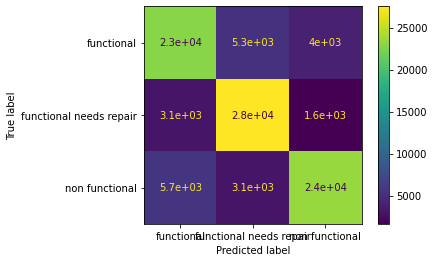

In [ ]:
ada_boost = AdaBoostClassifier(random_state=666)
evaluate_classifier(gbc, X_train, y_train.values.ravel())